In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

In [2]:
path1 = r'./22-Feb-2023_15_44_37_UTdatasetAI/Cat1_0.3-0.4/'
files_type1 = glob.glob(path1+'/*.txt')
path2 = r'./22-Feb-2023_15_44_37_UTdatasetAI/Cat2_0.5-0.6/'
files_type2 = glob.glob(path2+'/*.txt')
path3 = r'./22-Feb-2023_15_44_37_UTdatasetAI/Cat3_0.7-0.8/'
files_type3 = glob.glob(path3+'/*.txt')
path4 = r'./22-Feb-2023_15_44_37_UTdatasetAI/Cat4_0.9-1.0/'
files_type4 = glob.glob(path4+'/*.txt')

# A_Scan_Type1= './Initialzation/A-scan_1_0.3-0.4.txt'
# file_path = A_Scan_Type1

# file_path = glob.glob(path+'/*.txt')


def reading_data(files):
    num_lines_per_row = 301
    data_rows = []    # Open the text file and read the data
    for file in files:
        with open(file, "r") as f:
            # Initialize a list to hold the lines for each row    
            row_lines = []
            for line in f:    # Append the line to the row_lines list        
                row_lines.append(line.strip())   # If we have reached the desired number of lines per row,        # add the row to the data_rows list and reset the row_lines list        
                if len(row_lines) == num_lines_per_row:
                    data_rows.append(row_lines)
                    row_lines = []
    df = pd.DataFrame(data_rows)
    return df
# Create a pandas dataframe from the data_rows list
# df = pd.DataFrame(data_rows)

# df_raw = []
# for file in files:
#     read = pd.read_csv(file, index_col=None, header=0)
#     df_raw.append(read)
    
# df1 = pd.concat(df_raw, axis=0, ignore_index=True)


In [198]:
df1 = reading_data(files_type1)
df2 = reading_data(files_type2)
df3 = reading_data(files_type3)
df4 = reading_data(files_type4)

df_array_raw = [df1,df2,df3,df4]
df_array_raw = pd.concat(df_array_raw)

type1 = 1
df1['Class'] = type1

type2 = 2
df2['Class'] = type2

type3 = 3
df3['Class'] = type3

type4 = 4
df4['Class'] = type4

frames = [df1, df2, df3, df4]
df = pd.concat(frames)

In [199]:
df_array.shape

(33696, 301)

In [219]:
import numpy as np

# Create the label column
num_samples_per_class = 3396
labels = np.ones((df_array_raw.shape[0],1), dtype=int)

# Assign labels based on the index of the rows
for i in range(4):
    start_index = i * num_samples_per_class
    end_index = (i + 1) * num_samples_per_class
    labels[start_index:end_index] = i + 1

# Add the label column to the data array
data_array_labeled = np.hstack((df_array_raw, labels))


print(np.unique(data_array_labeled[:,-1]))

[1 2 3 4]


In [220]:
data_array_labeled[:,-1]

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,Class
0,1.58211E-02,1.65952E-02,1.68462E-02,1.57903E-02,1.32709E-02,9.40340E-03,4.28645E-03,-1.80451E-03,-8.02466E-03,-1.30227E-02,...,1.92025E-02,1.76344E-02,1.52232E-02,1.47886E-02,1.66019E-02,1.78768E-02,1.73356E-02,2.09414E-02,4.12866E-02,1
1,5.96326E-02,5.66848E-02,4.63872E-02,2.87293E-02,5.75815E-03,-2.00996E-02,-4.68835E-02,-7.28751E-02,-9.63130E-02,-1.15650E-01,...,2.82039E-02,2.21632E-02,1.33788E-02,6.26041E-03,3.88402E-03,6.19407E-03,1.17924E-02,2.11553E-02,3.67302E-02,1
2,3.69783E-02,4.75949E-02,4.92611E-02,4.23525E-02,3.04049E-02,1.66376E-02,2.16941E-03,-1.31280E-02,-2.92353E-02,-4.59604E-02,...,4.29347E-02,3.78831E-02,2.79054E-02,1.78082E-02,1.29187E-02,1.54142E-02,2.37854E-02,3.52471E-02,4.74617E-02,1
3,4.82332E-02,6.01582E-02,6.13637E-02,5.14864E-02,3.43893E-02,1.35217E-02,-1.03645E-02,-3.77918E-02,-6.83414E-02,-1.00426E-01,...,3.62626E-02,2.86584E-02,1.43580E-02,-8.29852E-04,-9.44897E-03,-7.77203E-03,2.17634E-03,1.51403E-02,2.59175E-02,1
4,6.66256E-02,7.58544E-02,7.38886E-02,5.89032E-02,3.38960E-02,2.58139E-03,-3.28233E-02,-7.06667E-02,-1.08575E-01,-1.44133E-01,...,2.93758E-02,2.23341E-02,6.23904E-03,-1.25966E-02,-2.53038E-02,-2.65593E-02,-1.73654E-02,-2.88916E-03,1.09275E-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,-1.61794E-01,-1.65499E-01,-1.57957E-01,-1.47737E-01,-1.41501E-01,-1.41199E-01,-1.44295E-01,-1.46187E-01,-1.42698E-01,-1.31492E-01,...,8.98216E-04,-1.59240E-02,-2.79739E-02,-3.24361E-02,-2.71985E-02,-1.22189E-02,9.54662E-03,3.29792E-02,5.30388E-02,4
8420,-2.37514E-01,-1.97695E-01,-1.46576E-01,-9.58913E-02,-5.32465E-02,-2.06788E-02,3.45564E-03,2.18068E-02,3.69330E-02,5.15085E-02,...,7.78469E-03,-7.63977E-03,-1.79561E-02,-2.04295E-02,-1.33344E-02,2.90756E-03,2.52077E-02,4.88889E-02,6.97880E-02,4
8421,-2.46379E-01,-1.55040E-01,-5.01821E-02,5.85584E-02,1.63226E-01,2.56261E-01,3.28629E-01,3.70684E-01,3.76023E-01,3.45074E-01,...,2.54115E-02,1.27041E-02,4.31994E-03,2.69114E-03,8.59297E-03,2.09733E-02,3.79000E-02,5.82468E-02,8.25803E-02,4
8422,9.02557E-02,9.50639E-02,9.16290E-02,7.57392E-02,4.38301E-02,-5.11225E-03,-6.80840E-02,-1.38188E-01,-2.06208E-01,-2.62800E-01,...,-3.29424E-03,-1.72796E-02,-2.59840E-02,-2.80918E-02,-2.57688E-02,-2.34730E-02,-2.38767E-02,-2.37803E-02,-1.42930E-02,4


In [6]:
df_array = df.to_numpy()

# PCA Clustering

In [7]:
df_array.shape

(33696, 302)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(df_array_raw)

[ True  True  True ...  True  True  True]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


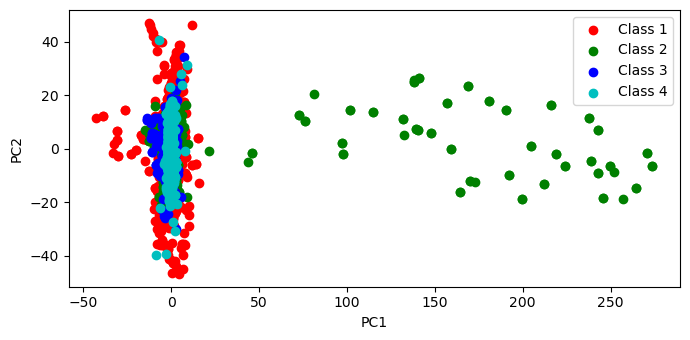

In [221]:
# Plot the data
colors = ['r', 'g', 'b', 'c'] # Colors for each class
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4'] # Class labels
for i in range(4):
    plt.scatter(X_pca[data_array_labeled[:,-1] == (i+1), 0], X_pca[data_array_labeled[:,-1] == (i+1), 1], c=colors[i], label=labels[i])
    print(data_array_labeled[:,-1] == (i+1))
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [10]:
# Defining label and data
X = df.iloc[:, :301].values
y = df.iloc[:, -1].values

In [11]:
X

array([['1.58211E-02', '1.65952E-02', '1.68462E-02', ..., '1.73356E-02',
        '2.09414E-02', '4.12866E-02'],
       ['5.96326E-02', '5.66848E-02', '4.63872E-02', ..., '1.17924E-02',
        '2.11553E-02', '3.67302E-02'],
       ['3.69783E-02', '4.75949E-02', '4.92611E-02', ..., '2.37854E-02',
        '3.52471E-02', '4.74617E-02'],
       ...,
       ['-2.46379E-01', '-1.55040E-01', '-5.01821E-02', ...,
        '3.79000E-02', '5.82468E-02', '8.25803E-02'],
       ['9.02557E-02', '9.50639E-02', '9.16290E-02', ..., '-2.38767E-02',
        '-2.37803E-02', '-1.42930E-02'],
       ['-2.25033E-01', '-1.77424E-01', '-1.16757E-01', ...,
        '-1.18855E-02', '-2.95777E-02', '-3.52016E-02']], dtype=object)

In [12]:
y

array([1, 1, 1, ..., 4, 4, 4], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26956, 301)
(6740, 301)
(26956,)
(6740,)


# K Nearest

In [14]:
# Kn
from sklearn.neighbors import KNeighborsClassifier

classifier_kn1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
history_kn1 = classifier_kn1.fit(X_train, y_train)

In [15]:
y_pred_kn1 = classifier_kn1.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score

Confusion_matrix_Kn1 = confusion_matrix(y_test, y_pred_kn1)
accuracy_kn1 = accuracy_score(y_test,y_pred_kn1)
accuracy_kn1

0.8568249258160238

In [17]:
Confusion_matrix_Kn1

array([[1359,  249,   68,   28],
       [  94, 1387,  180,   46],
       [  15,   78, 1424,  125],
       [   5,   25,   52, 1605]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

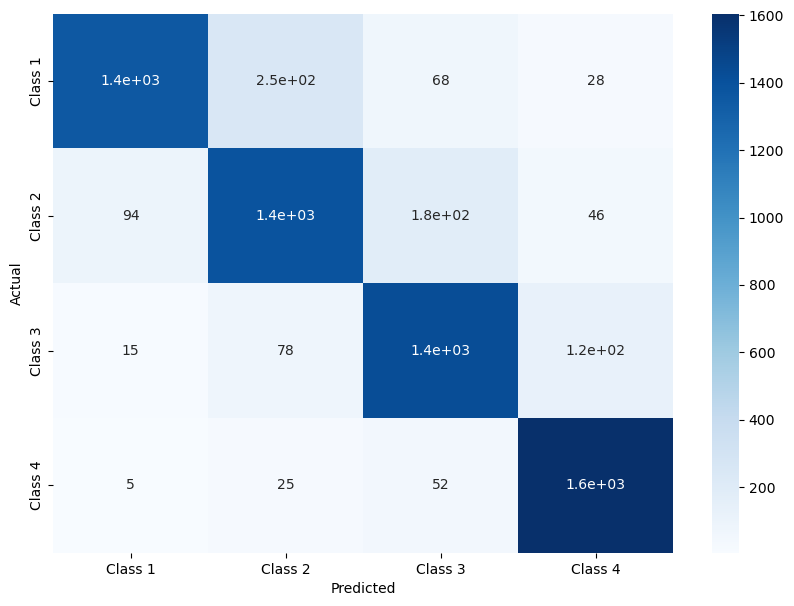

In [36]:
# Confusion_matrix_Kn1
plt.figure(figsize = (10,7))
ax = sns.heatmap(Confusion_matrix_Kn1, annot=True, cmap= 'Blues')

# ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# set y-axis label and ticks
# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])



plt.xlabel('Predicted')
plt.ylabel('Actual')



# Normalizeing Data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_array_Scaler = sc.fit_transform(df_array)
X_train_Scaler = sc.fit_transform(X_train)
X_test_Scaler = sc.transform(X_test)

# PCA

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_Scaler)

[ True  True  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True  True  True]


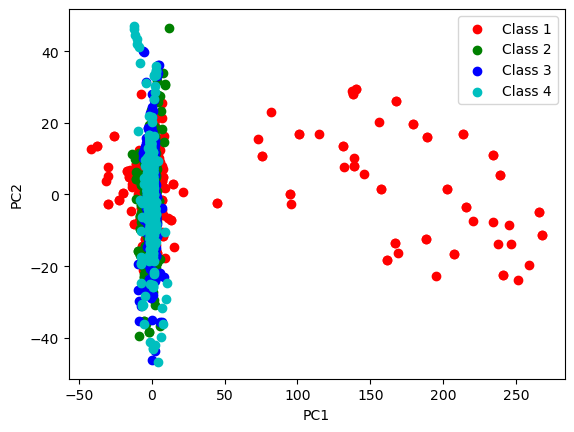

In [30]:
# Plot the data
colors = ['r', 'g', 'b', 'c'] # Colors for each class
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4'] # Class labels
for i in range(4):
    plt.scatter(X_pca[y_train == (i+1), 0], X_pca[y_train == (i+1), 1], c=colors[i], label=labels[i])    
    print(df_array[:,-1] == (i+1))
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# PCA 3D

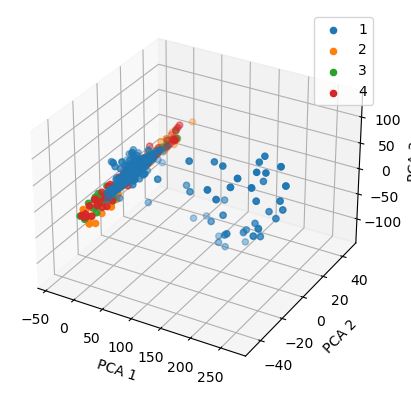

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# # Assume your data is stored in a numpy array called `data` with shape (416, 9, 9, 301)
# n_samples = X.shape[0]
# n_features = X.shape[1] * X.shape[2] * X.shape[3]


# # Reshape data into a 2D array
# data_2d = np.reshape(X, (n_samples, n_features))

# # Perform PCA on the data
# pca = PCA(n_components=3)
# data_pca = pca.fit_transform(data_2d)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_Scaler)
# Get the class labels for each instance
# Assume the class labels are stored in a numpy array called `labels`
# labels = np.array([0, 1, 2, 3]) # Replace with your own labels

# Create a scatter plot of the data in 3D using the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y_train):
    mask = np.isin(y_train, label)
#     ax.scatter(data_pca[mask.flatten(), 0], data_pca[mask.flatten(), 1], data_pca[mask.flatten(), 2], label=label)
#     ax.scatter(data_pca[mask, 0], data_pca[mask, 1], data_pca[mask, 2], label=label)
#     indices = np.where(mask)[0]
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], label=label)

#     ax.scatter(data_pca[mask, 0], data_pca[mask, 1], data_pca[mask, 2], label=label)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()
plt.show()


# KPCA 3D

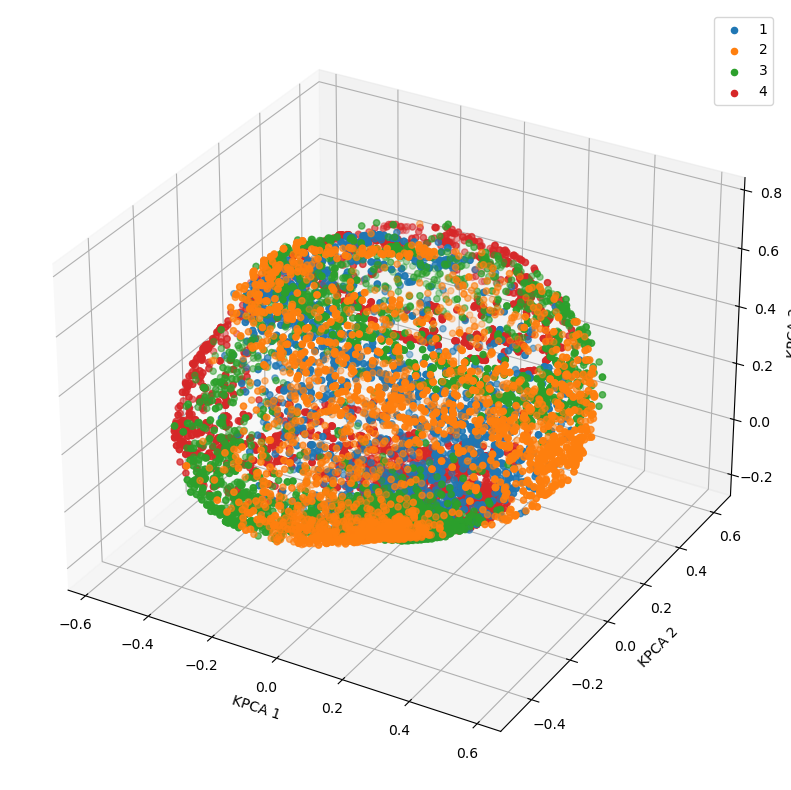

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import KernelPCA

# # load data
# data = np.load("data.npy")
# labels = np.load("labels.npy")

# flatten data to 2D
# data = X.reshape((X.shape[0], -1))

# perform kernel PCA
kpca = KernelPCA(n_components=3, kernel="rbf", gamma=0.1)
data_kpca = kpca.fit_transform(X_train_Scaler)

# plot results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
for label in np.unique(y_train):
    mask = (y_train == label)
    ax.scatter(data_kpca[mask, 0], data_kpca[mask, 1], data_kpca[mask, 2], label=label)
ax.set_xlabel("KPCA 1")
ax.set_ylabel("KPCA 2")
ax.set_zlabel("KPCA 3")
plt.legend()
plt.show()


# KPCA 2D

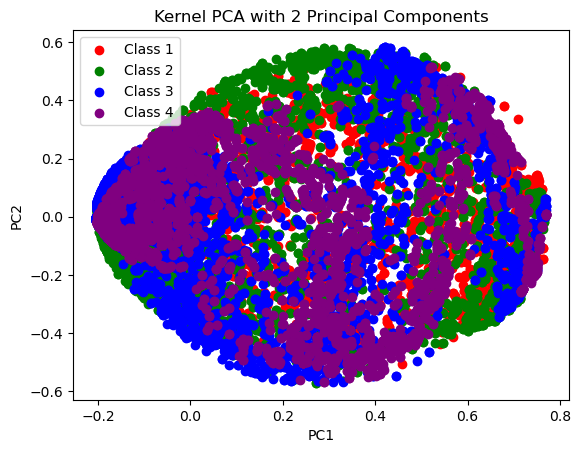

In [73]:
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1)
X_kpca = kpca.fit_transform(X_train_Scaler)

# Plot the transformed data


colors = ['red', 'green', 'blue', 'purple']
for i in range(4):
    plt.scatter(X_kpca[y_train==(i+1), 0], X_kpca[y_train==(i+1), 1], color=colors[i], label=f'Class {i+1}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel PCA with 2 Principal Components')
plt.legend()
plt.show()

In [31]:
classifier_kn2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_kn2.fit(X_train_Scaler, y_train)


KNeighborsClassifier()

In [32]:
y_pred_kn2 = classifier_kn2.predict(X_test_Scaler)

In [33]:
Confusion_matrix_Kn2 = confusion_matrix(y_test, y_pred_kn2)
accuracy_kn2 = accuracy_score(y_test, y_pred_kn2)
accuracy_kn2

0.9329376854599406

Text(95.72222222222221, 0.5, 'Actual')

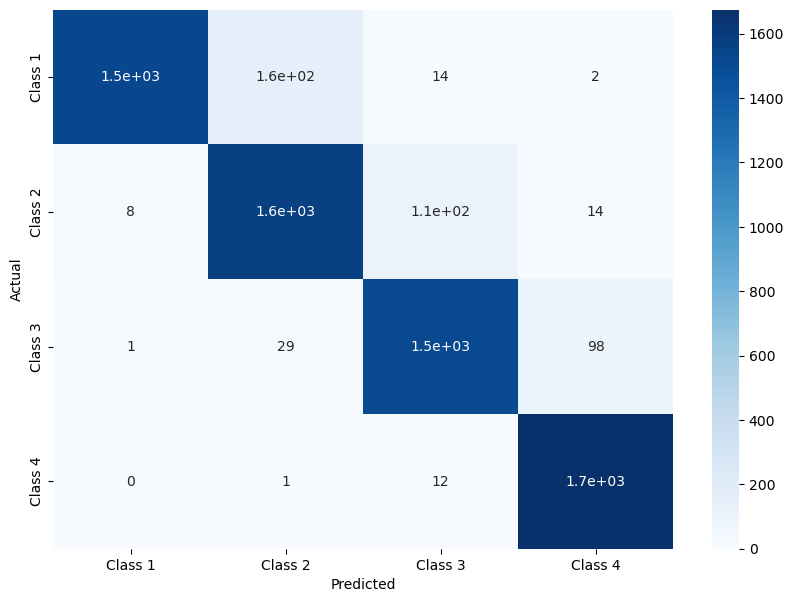

In [38]:
# Confusion Matrix Kn2
plt.figure(figsize = (10,7))

ax = sns.heatmap(Confusion_matrix_Kn2, annot=True, cmap= 'Blues')

# ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# set y-axis label and ticks
# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])




plt.xlabel('Predicted')
plt.ylabel('Actual')

In [40]:
# logistic Regression
from sklearn.linear_model import LogisticRegression

model_Logistic = LogisticRegression()
log_history = model_Logistic.fit(X_train, y_train)

y_pred_LogisticRegression = model_Logistic.predict(X_test)

C:\Users\eftek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Confusion Matrix for LogisticRegression
Confusion_matrix_LogisticRegression = confusion_matrix(y_test, y_pred_LogisticRegression)
accuracy_LogisticRegression = accuracy_score(y_test,y_pred_LogisticRegression)
accuracy_LogisticRegression


0.3353115727002967

Text(95.72222222222221, 0.5, 'Actual')

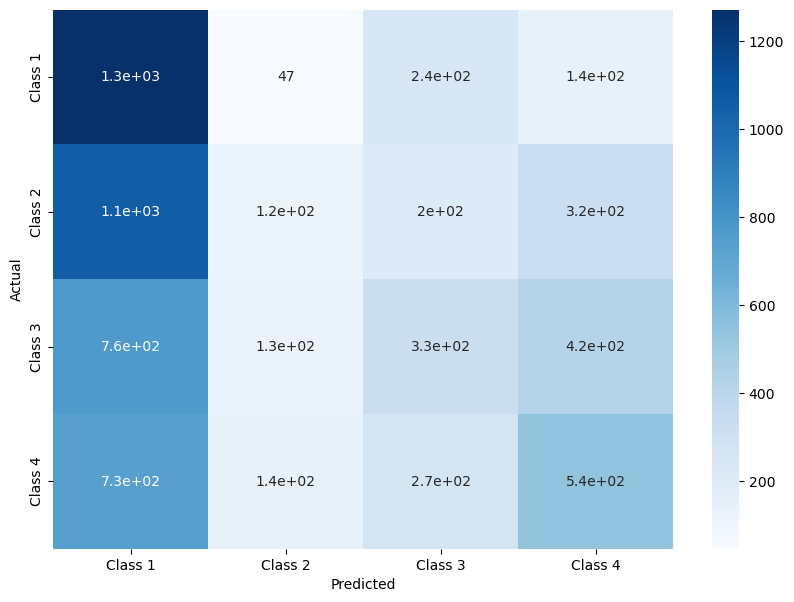

In [42]:
# Confusion Matrix LogisticRegression
plt.figure(figsize = (10,7))


ax = sns.heatmap(Confusion_matrix_LogisticRegression, annot=True, cmap= 'Blues')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [186]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(df_array_Scaler)

X_pca.shape

(33696, 36)

In [193]:
df_array_Scaler[:,-1]

array([-1.34164079, -1.34164079, -1.34164079, ...,  1.34164079,
        1.34164079,  1.34164079])

[ True  True  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True  True  True]


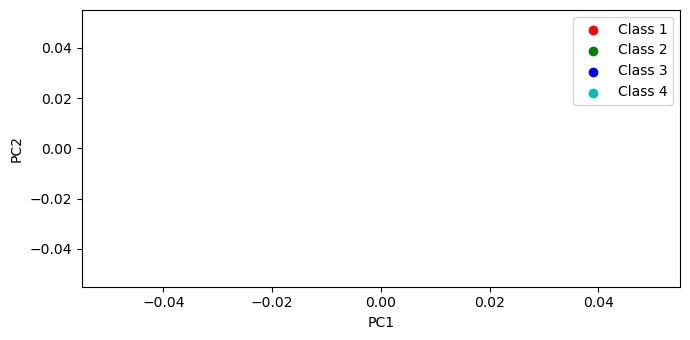

In [192]:
# Plot the data
colors = ['r', 'g', 'b', 'c'] # Colors for each class
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4'] # Class labels
for i in range(4):
    plt.scatter(X_pca[df_array_Scaler[:,-1] == (i+1), 0], X_pca[df_array_Scaler[:,-1] == (i+1), 1], c=colors[i], label=labels[i])    
    print(df_array[:,-1] == (i+1))
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [82]:
X_pca

array([[-2.88423130e-01, -2.03064520e-03, -5.11561174e-02, ...,
         2.00285121e-01, -2.54123758e-03,  8.98328594e-02],
       [-3.54154116e-01,  6.97633437e-01, -1.48736347e-01, ...,
         8.84041086e-02,  3.79118133e-02,  5.85536776e-02],
       [-1.32010770e-01, -2.62384207e-02, -1.55206415e-01, ...,
         4.58066420e-01, -7.31452802e-02, -6.65164434e-03],
       ...,
       [-3.20895421e-01, -2.04013679e+00,  1.70132496e-01, ...,
        -1.03087412e-01,  1.58787154e-01,  1.16138819e-01],
       [-8.07536465e-01,  3.26859364e-01, -1.64524096e-01, ...,
        -5.71734322e-01, -3.99299691e-01,  1.75319442e-01],
       [-3.99520575e-02,  1.01193905e+00, -1.01833247e-01, ...,
        -2.98051312e-01,  4.22804241e-01,  2.07347823e-02]])

In [83]:
pca.explained_variance_ratio_

array([0.27283821, 0.07771453, 0.06879792, 0.05338806, 0.04229398,
       0.03782665, 0.03605119, 0.03233945, 0.02817377, 0.02683807,
       0.02230432, 0.02151303, 0.02010035, 0.01912168, 0.01781865,
       0.01706465, 0.01471562, 0.01296319, 0.01242447, 0.0113653 ,
       0.01112443, 0.00997501, 0.00903088, 0.00871733, 0.00763535,
       0.00739588, 0.00707227, 0.006487  , 0.00618672, 0.00583879,
       0.00510004, 0.0048411 , 0.00423638, 0.00404496, 0.00390452,
       0.00340627])

In [84]:
pca.n_components_

36

In [85]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y, test_size=0.2)

In [92]:
y_test_pca.shape

(6740,)

In [94]:
model_Logistic_pca = LogisticRegression()
model_Logistic_pca.fit(X_train_pca, y_train_pca)

y_pred_LogisticRegression_pca = model_Logistic_pca.predict(X_test_pca)
y_pred_LogisticRegression_pca.shape

C:\Users\eftek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(6740,)

In [95]:
Confusion_matrix_LogisticRegression_pca = confusion_matrix(y_test_pca, y_pred_LogisticRegression_pca)
accuracy_LogisticRegression_pca = accuracy_score(y_test_pca,y_pred_LogisticRegression_pca)
accuracy_LogisticRegression_pca


0.7396142433234422

In [96]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

In [97]:
y_pred_pca = classifier.predict(X_test_pca)
ac_Kn_pca = accuracy_score(y_test_pca, y_pred_pca)

In [98]:
ac_Kn_pca

0.9439169139465875

In [99]:
Confusion_matrix_Kn_pca = confusion_matrix(y_test_pca, y_pred_pca)
accuracy_kn_pca = accuracy_score(y_test_pca,y_pred_pca)
accuracy_kn_pca

0.9439169139465875

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Load the iris dataset (which has four classes)
iris = datasets.load_iris()
X = iris.data[:, :2]  # select only the first two features
y = iris.target

# Create an instance of KNeighborsClassifier with n_neighbors=5
clf = neighbors.KNeighborsClassifier(n_neighbors=5)

# Fit the model using the data
clf.fit(X, y)

# Define the colormap for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFA500'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#FF8C00']

# Set the step size for the meshgrid
h = 0.02

# Define the boundaries of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generate a meshgrid of points to evaluate the classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted labels to the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(7, 4))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
for i, color in zip(range(4), cmap_bold):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=cmap_bold, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("4-Class classification (k = 5)")
plt.legend()
plt.show()


Text(95.72222222222221, 0.5, 'Actual')

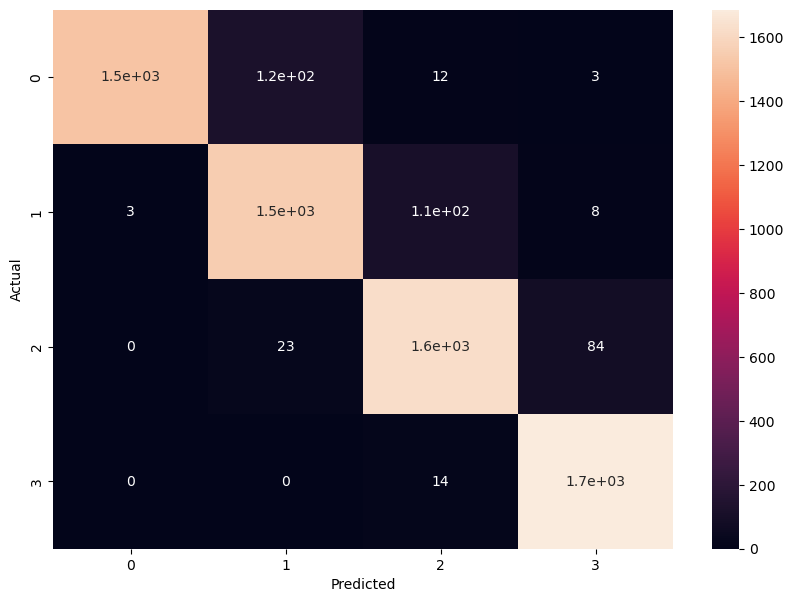

In [100]:
# Confusion Matrix LogisticRegression
plt.figure(figsize = (10,7))

ax = sns.heatmap(Confusion_matrix_Kn_pca, annot=True, cmap= 'Blues')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [101]:
# x1 = df.iloc[:81, :301]
# x2 = df.iloc[:, 301:602]
# x3 = 

# kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

# plt.hist(x1, **kwargs)
# plt.hist(x2, **kwargs)
# plt.hist(x3, **kwargs);

In [102]:
# LSTM for the second time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [122]:
m = Sequential()
m.add(LSTM(units=50, return_sequences= True, input_shape = (X_train.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units=50))
m.add(Dropout(0.2))
m.add(Dense(units=1))
m.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [123]:
history_LSTM = m.fit(X_train_Scaler, y_train ,epochs = 50, batch_size = 128, verbose=1)

Epoch 1/50
211/211 [==============================] - 265s 985ms/step - loss: 2.9828e-07 - accuracy: 0.0000e+00
Epoch 2/50
211/211 [==============================] - 201s 954ms/step - loss: 2.9828e-07 - accuracy: 0.0000e+00
Epoch 3/50
211/211 [==============================] - 187s 885ms/step - loss: 2.9828e-07 - accuracy: 0.0000e+00
Epoch 4/50
211/211 [==============================] - 187s 886ms/step - loss: 2.9828e-07 - accuracy: 0.0000e+00
Epoch 5/50
211/211 [==============================] - 190s 898ms/step - loss: 2.9828e-07 - accuracy: 0.0000e+00
Epoch 6/50
211/211 [==============================] - 198s 939ms/step - loss: 2.9828e-07 - accuracy: 0.0000e+00
Epoch 7/50
211/211 [==============================] - 210s 996ms/step - loss: 2.9828e-07 - accuracy: 0.0000e+00
Epoch 8/50
211/211 [==============================] - 204s 965ms/step - loss: 2.9828e-07 - accuracy: 0.0000e+00
Epoch 9/50
211/211 [==============================] - 210s 995ms/step - loss: 2.9828e-07 - accuracy: 0.0

In [124]:
m.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 301, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 301, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [130]:
history_LSTM.history.keys()

dict_keys(['loss', 'accuracy'])

In [137]:
y_pred_LSTM = m.predict(X_test_Scaler)



211/211 [==============================] - 17s 82ms/step


In [138]:
y_pred_LSTM

array([[ 2.2564898e-04],
       [ 2.0410994e-04],
       [ 2.7082278e-04],
       ...,
       [-3.2144118e-05],
       [ 2.7276113e-04],
       [ 9.2344380e-05]], dtype=float32)

In [ ]:

accuracy = accuracy_score(y_test,y_pred_LSTM)
accuracy

In [ ]:
Confusion_matrix_LSTM = confusion_matrix(y_test, y_pred_LSTM)

In [ ]:
# Confusion_matrix_Kn1
plt.figure(figsize = (10,7))
ax = sns.heatmap(Confusion_matrix_LSTM, annot=True, cmap="Blues")

# ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# set y-axis label and ticks
# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])



plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Saving SVM model

filename_LSTM = "Completed_model_LSTM.joblib"
joblib.dump(m, filename_LSTM)

In [ ]:
plt.figure()
plt.ylabel('Accuracy');plt.xlabel('epoch')
plt.semilogy(history_LSTM.history['val_accuracy'])

In [ ]:
# Validation LSTM

X_test_LSTM = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

y_pred_LSTM = m.predict(X_test_LSTM)

# plt.figure()
# plt.plot(y_pred_LSTM[:100,:],':',label='LSTM')
# plt.plot(y_test[:100],'--',label='Actual')
# plt.legend()


In [ ]:
accuracy_LSTM = accuracy_score(y_test,X_test_LSTM)

In [160]:
generatorTrain = TimeseriesGenerator(X_train,y_train, length=301, batch_size=50)


epoch = 20
model = Sequential()
model.add(LSTM(1, activation= 'ReLU'))
model.add(Dense(5))
model.compile(optimizer= 'adam', loss='mse')
history = model.fit(generatorTrain, epochs=epoch, batch_size=20, verbose=1, shuffle=False)

NameError: name 'TimeseriesGenerator' is not defined

In [ ]:
model.summary()

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.legend()

In [ ]:
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# m = confusion_matrix(y_test, y_pred)
# ac = accuracy_score(y_test, y_pred)
x_testt = [(X_test,1)]
y_pred_LSTM = model.predict(x_testt)


Confusion_matrix_LSTM = confusion_matrix(y_test, y_pred_LSTM)
accuracy = accuracy_score(y_test,y_pred_LSTM)
accuracy

In [ ]:
Confusion_matrix_LSTM

In [170]:
# TSNE
from sklearn.manifold import TSNE

model_TSNE = TSNE(learning_rate = 100)
tsne_featurs = model_TSNE.fit_transform(df_array_Scaler)



In [171]:
df['x_tsne'] = tsne_featurs[:,0]
df['y_tsne'] = tsne_featurs[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

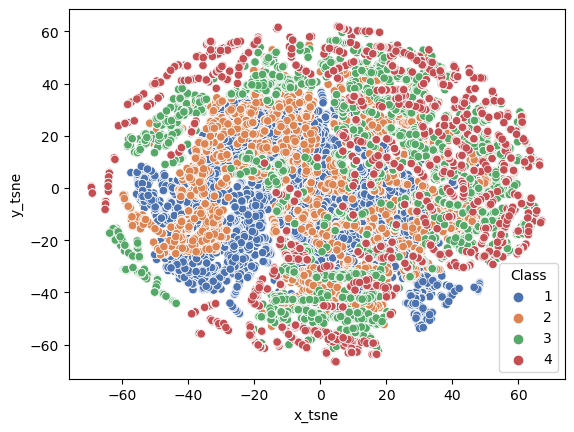

In [172]:
sns.scatterplot(x='x_tsne', y='y_tsne',hue = 'Class',  data=df, palette="deep")
plt.show

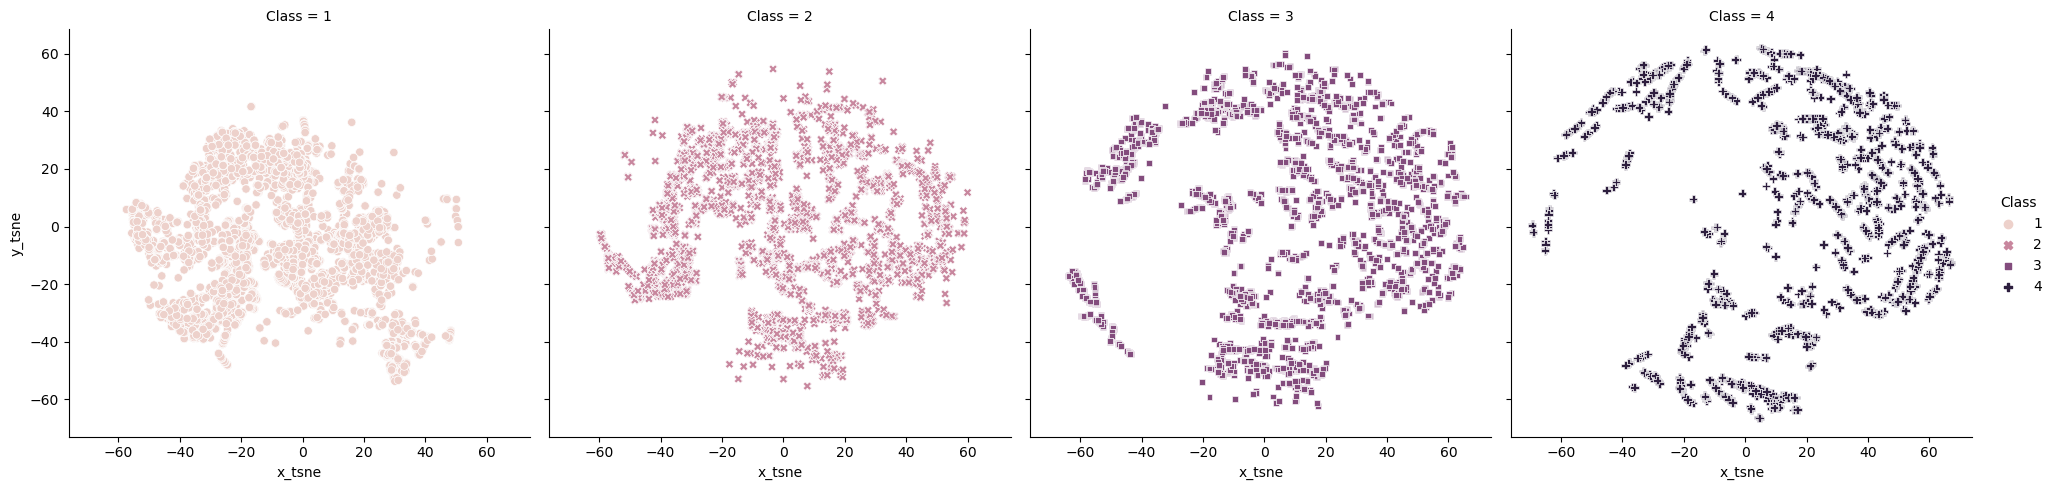

In [174]:
sns.relplot(
    data=df, x="x_tsne", y="y_tsne",
    col="Class", hue="Class", style="Class",
    kind="scatter"
)

In [143]:
# SVM
from sklearn.svm import SVC

Model_SVM = SVC(gamma='auto')
Model_SVM.fit(X_train ,y_train)


SVC(gamma='auto')

In [144]:
# print(f'Accuracy - : {Model_SVM.score(X,y):.3f}')

In [145]:
y_pred_SVM = Model_SVM.predict(X_test)

In [146]:
# Validation

Confusion_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
accuracy_SVM = accuracy_score(y_test,y_pred_SVM)
accuracy_SVM


0.8649851632047477

In [153]:
print(Model_SVM)

SVC(gamma='auto')


Text(95.72222222222221, 0.5, 'Actual')

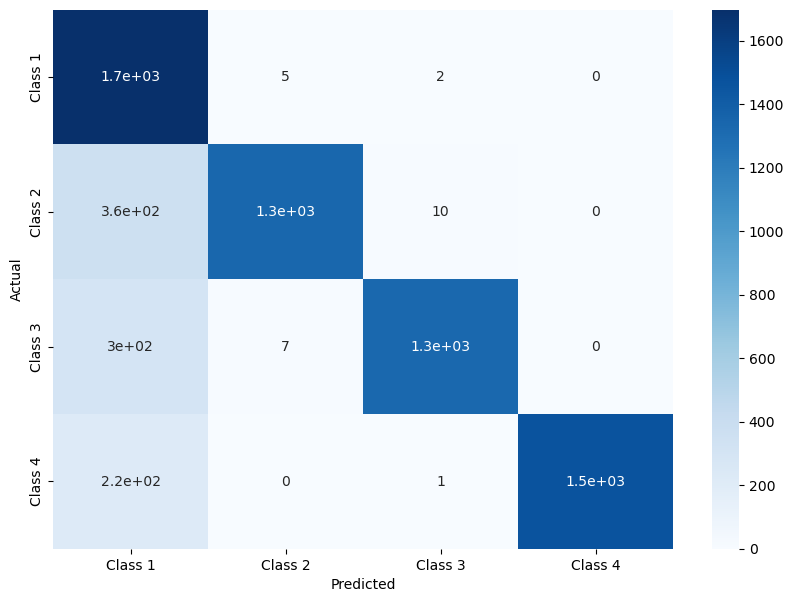

In [154]:
# Confusion Matrix SVM
plt.figure(figsize = (10,7))

ax = sns.heatmap(Confusion_matrix_SVM, annot=True, cmap= 'Blues')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [148]:
# Saving SVM model

filename_SVM = "Completed_model_SVM.joblib"
joblib.dump(Model_SVM, filename_SVM)

['Completed_model_SVM.joblib']